# Exploratory Data Analysis
### Import libraries and read CSV file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [29]:
df_ori = pd.read_csv("user_data_ftcr_minmax_test.csv", sep=',')

In [30]:
df_ori

,trx_date,report_date,registereddate,birthday,is_verified,aqc_freq_prepaid_mobile,aqc_mean_prepaid_mobile_amount,aqc_freq_topup,aqc_freq_topup_within_7d,aqc_mean_topup_amount,...,job_position_KARYAWAN,job_position_LAINNYA,job_position_PEGAWAI_NS,job_position_PELAJAR,job_position_RUMAH_TANGGA,job_position_SPESIALIS,job_position_TIDAK_KERJA,job_position_WIRASWASTA,uid,is_scammer
0,0.665502,0.93750,0.503446,0.861074,1,1.000000,0.094882,0.402572,0.584112,0.001254,...,0,0,0,0,1,0,0,0,a4377cf6-8fe3-408f-b438-534671da6ed1,0
1,0.047162,0.06750,0.052033,0.771775,1,0.000000,0.000000,0.015826,0.004673,0.007630,...,1,0,0,0,0,0,0,0,b5c4d8ab-5d0e-483e-8c74-968e90efd07f,1
2,0.070742,0.08500,0.398001,0.770692,1,0.007782,0.004075,0.022750,0.000000,0.000633,...,1,0,0,0,0,0,0,0,36a93fc1-b26c-4d34-be3e-404d233b1cbe,1
3,0.007860,0.01125,0.198828,0.743068,1,0.000000,0.000000,0.010880,0.004673,0.001170,...,0,0,0,0,1,0,0,0,88296630-c0b9-46eb-b41c-829edc38a101,1
4,0.086463,0.12250,0.062371,0.720752,1,0.000000,0.000000,0.032641,0.028037,0.000678,...,0,0,0,0,1,0,0,0,b91c38fe-3061-409a-9a28-dff26a4587a4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137,0.551965,0.77125,0.219848,1.000000,0,0.000000,0.000000,0.008902,0.021028,0.002348,...,0,1,0,0,0,0,0,0,fb77cca3-d9d8-4d80-bab7-63d0fdb92183,1
2138,0.279476,0.39250,0.115093,1.000000,0,0.000000,0.000000,0.015826,0.037383,0.001780,...,0,1,0,0,0,0,0,0,51e6482a-f277-434f-b42c-641637856554,1
2139,0.285590,0.40375,0.115093,1.000000,0,0.019455,0.259843,0.003956,0.009346,0.001026,...,0,1,0,0,0,0,0,0,3e9c9ba5-e85d-4c39-a609-0dcb8896e409,1
2140,0.616594,0.87250,0.565817,1.000000,0,0.000000,0.000000,0.001978,0.000000,0.001337,...,0,1,0,0,0,0,0,0,b0d62892-ecad-442d-b2c1-56666b673e36,0


In [31]:
df = df_ori.drop(columns = ['uid'])
df

,trx_date,report_date,registereddate,birthday,is_verified,aqc_freq_prepaid_mobile,aqc_mean_prepaid_mobile_amount,aqc_freq_topup,aqc_freq_topup_within_7d,aqc_mean_topup_amount,...,gender_None,job_position_KARYAWAN,job_position_LAINNYA,job_position_PEGAWAI_NS,job_position_PELAJAR,job_position_RUMAH_TANGGA,job_position_SPESIALIS,job_position_TIDAK_KERJA,job_position_WIRASWASTA,is_scammer
0,0.665502,0.93750,0.503446,0.861074,1,1.000000,0.094882,0.402572,0.584112,0.001254,...,0,0,0,0,0,1,0,0,0,0
1,0.047162,0.06750,0.052033,0.771775,1,0.000000,0.000000,0.015826,0.004673,0.007630,...,0,1,0,0,0,0,0,0,0,1
2,0.070742,0.08500,0.398001,0.770692,1,0.007782,0.004075,0.022750,0.000000,0.000633,...,0,1,0,0,0,0,0,0,0,1
3,0.007860,0.01125,0.198828,0.743068,1,0.000000,0.000000,0.010880,0.004673,0.001170,...,0,0,0,0,0,1,0,0,0,1
4,0.086463,0.12250,0.062371,0.720752,1,0.000000,0.000000,0.032641,0.028037,0.000678,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137,0.551965,0.77125,0.219848,1.000000,0,0.000000,0.000000,0.008902,0.021028,0.002348,...,0,0,1,0,0,0,0,0,0,1
2138,0.279476,0.39250,0.115093,1.000000,0,0.000000,0.000000,0.015826,0.037383,0.001780,...,0,0,1,0,0,0,0,0,0,1
2139,0.285590,0.40375,0.115093,1.000000,0,0.019455,0.259843,0.003956,0.009346,0.001026,...,0,0,1,0,0,0,0,0,0,1
2140,0.616594,0.87250,0.565817,1.000000,0,0.000000,0.000000,0.001978,0.000000,0.001337,...,0,0,1,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40717 entries, 0 to 40716
Data columns (total 57 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   trx_date                                      40717 non-null  float64
 1   report_date                                   40717 non-null  float64
 2   registereddate                                40717 non-null  float64
 3   birthday                                      40717 non-null  float64
 4   is_verified                                   40717 non-null  int64  
 5   aqc_freq_prepaid_mobile                       40717 non-null  float64
 6   aqc_mean_prepaid_mobile_amount                40717 non-null  float64
 7   aqc_freq_topup                                40717 non-null  float64
 8   aqc_freq_topup_within_7d                      40717 non-null  float64
 9   aqc_mean_topup_amount                         40717 non-null 

### Correlation Map

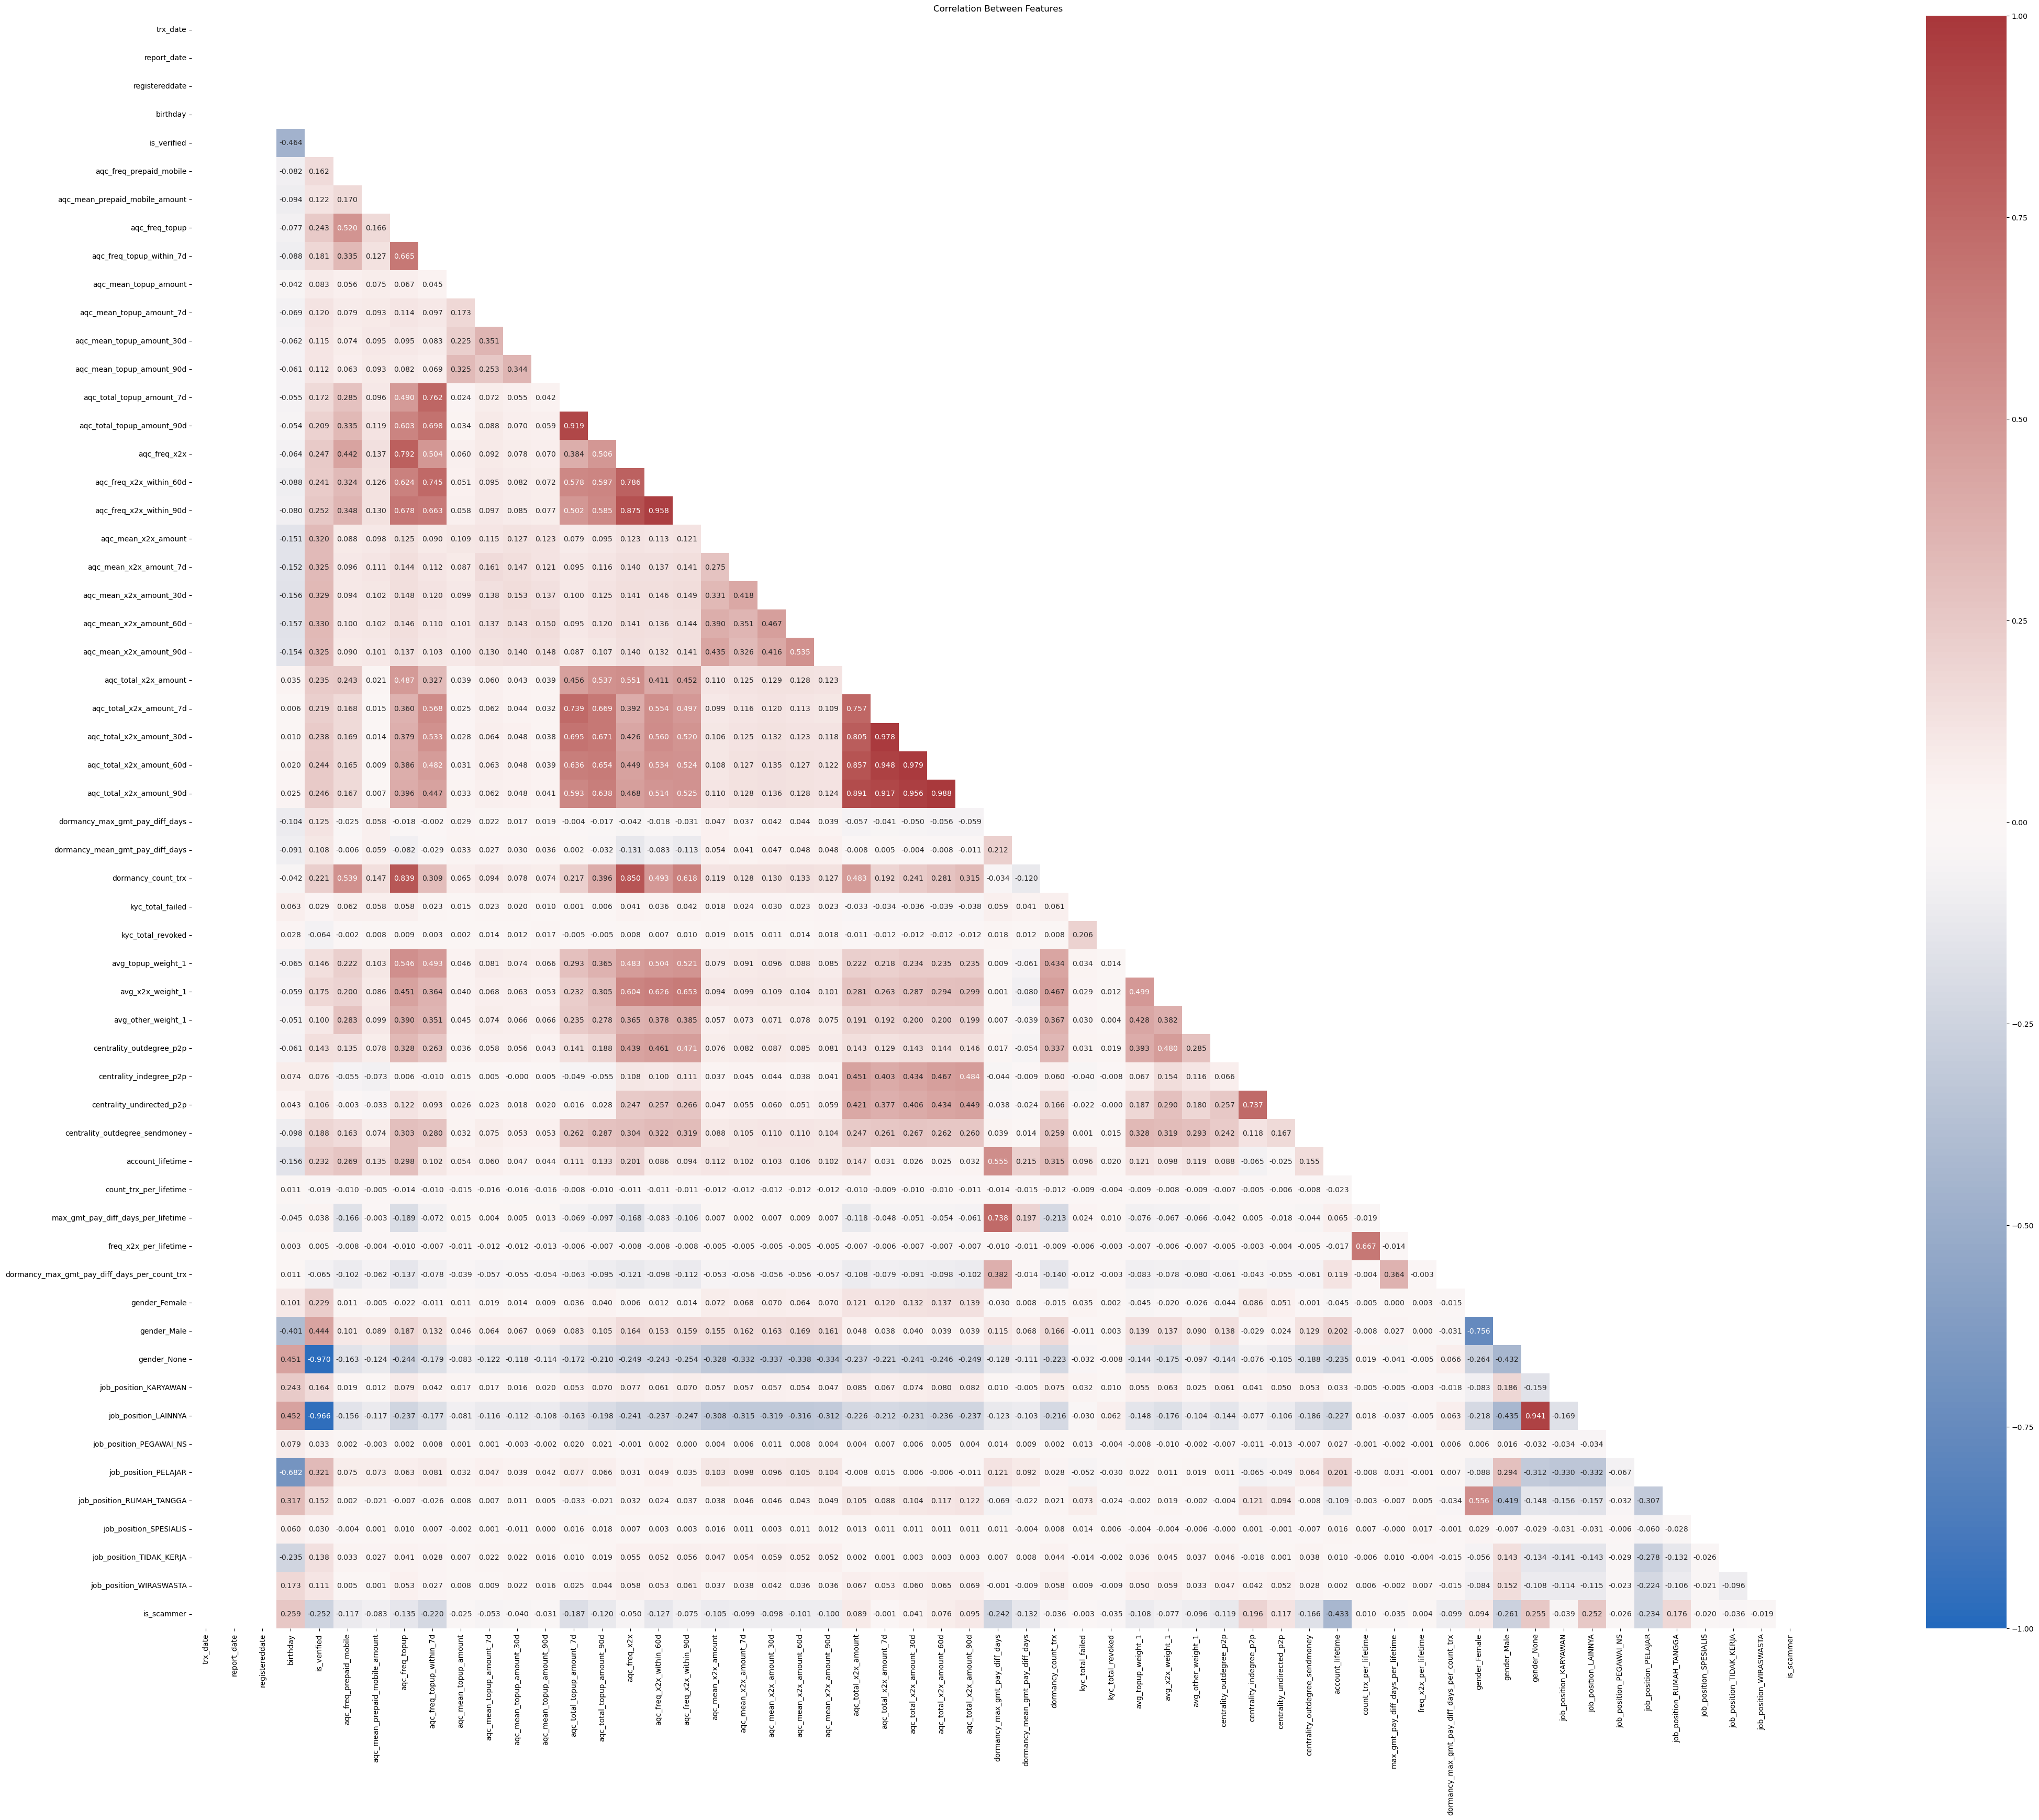

In [17]:
# Check Correlation of Features, then Make Relational Map
corr_column = df.select_dtypes(include=[np.number]).columns.to_list()

fig = plt.figure(figsize=(60,40))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Features')

mask = np.triu(np.ones_like(
    df[corr_column].corr(), dtype=np.bool_))

sns.heatmap(df[corr_column].corr(),
            vmin=-1, vmax=1, cmap='vlag', annot=True, fmt='.3f', mask=mask,
            annot_kws = {'fontsize': 10, 'fontweight':'roman'},
            square=True)

plt.show()

### Check Features with Large Correlation to is_scammer

#### registereddate

[Text(0.5, 1.0, 'Registereddate Histogram')]

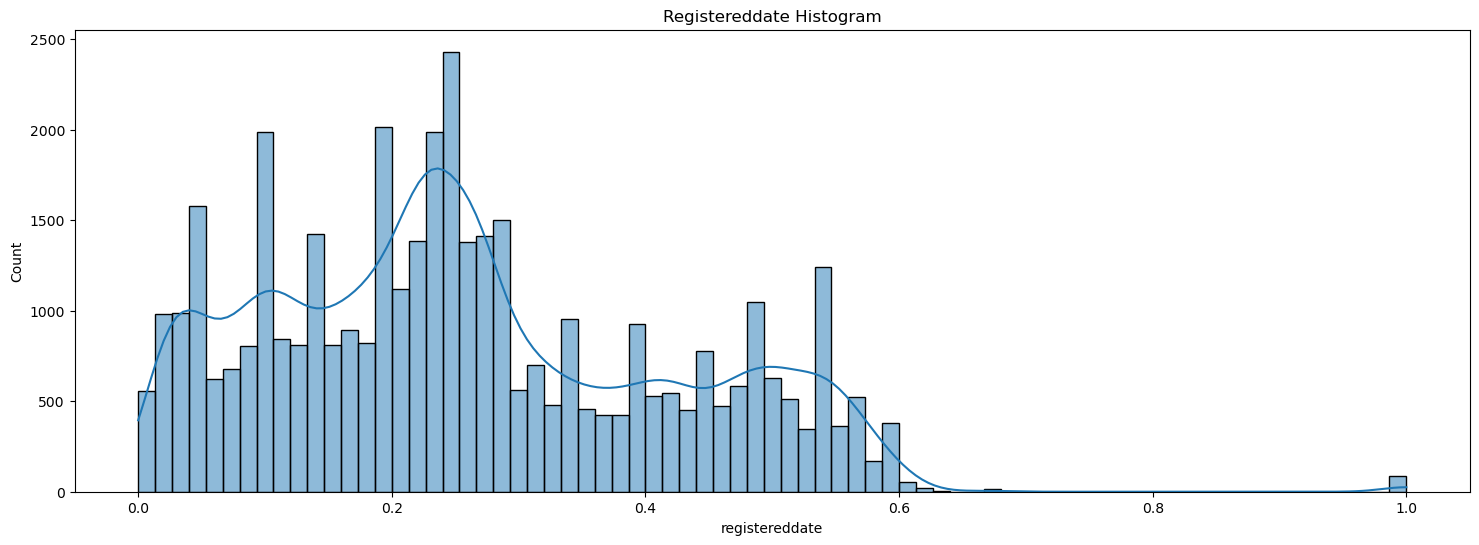

In [32]:
fig, axes = plt.subplots(1, 1, figsize=(18, 6))
sns.histplot(ax=axes, data=df['registereddate'], kde=True).set(title='Registereddate Histogram')

The 'registereddate' data presents the time from current date to each account's registered date in days, distributed into 63 distinct values. User's registereddate data are evenly distributed, with a few outliers given the value of 3000. This group of data are accounts that have null value in their registereddate feature.

In [19]:
df_reg_1 = df.loc[((df['registereddate'] < df['registereddate'].quantile(0.25)))]['is_scammer'].value_counts()
df_reg_2 = df.loc[((df['registereddate'] >= df['registereddate'].quantile(0.25)) & (df['registereddate'] < df['registereddate'].quantile(0.5)))]['is_scammer'].value_counts()
df_reg_3 = df.loc[((df['registereddate'] >= df['registereddate'].quantile(0.5)) & (df['registereddate'] < df['registereddate'].quantile(0.75)))]['is_scammer'].value_counts()
df_reg_4 = df.loc[((df['registereddate'] >= df['registereddate'].quantile(0.75)))]['is_scammer'].value_counts()

results = {
    'Q1' : [df_reg_1[1], df_reg_1[0]],
    'Q2' : [df_reg_2[1], df_reg_2[0]],
    'Q3' : [df_reg_3[1], df_reg_3[0]],
    'Q4' : [df_reg_4[1], df_reg_4[0]]
}

cat_names = ['Scammer', 'Not Scammer']

labels = list(results.keys())
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1)
cat_col = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, data.shape[1]))

fig, ax = plt.subplots(figsize=(9.2, 5))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(cat_names, cat_col)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.5, label=colname, color=color)
    xcenters = starts + widths / 2
    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    for y, (x, c) in enumerate(zip(xcenters, widths)):
        ax.text(x, y, str(int(c)), ha='center', va='center', color=text_color)
ax.legend(ncol=len(cat_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')
plt.title("Scammer Distribution based on Registereddate", pad=30)

KeyError: 1

Accounts made earlier are less likely to be a scammer than newer accounts. Only 21.5% of the 25% earliest made accounts are scammer compared to 69.0% of the 25% newest made accounts. On a side note, the scammer-nonscammer distribution of total dataset is 50-50.

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.histplot(ax=axes[0], data=df['registereddate'][df['is_scammer'] == 1], kde=True).set(title='Scammer')
sns.histplot(ax=axes[1], data=df['registereddate'][df['is_scammer'] == 0], kde=True).set(title='Not Scammer')

#### birthday

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(18, 6))
sns.histplot(ax=axes, data=df['birthday'], kde=True).set(title='Birthday Histogram')

The birthday feature presents each user's age in days, calculated from today (07/06/2023). We can see there are outliers which birthday equals 35000 or is 120 years old. This group data data are individuals which birthday data is non-existent (N/A). We will see the scammer distribution for that group of data.

In [ ]:
df.loc[((df['birthday'] > 32500))]['is_scammer'].value_counts()

Surprise, more than 80.8% of users with unregistered birthday are scammers.

In [ ]:
df2 = df.loc[((df['birthday'] <= 32500))]

df_birth_1 = df2.loc[((df2['birthday'] < df2['birthday'].quantile(0.25)))]['is_scammer'].value_counts()
df_birth_2 = df2.loc[((df2['birthday'] >= df2['birthday'].quantile(0.25)) & (df2['birthday'] < df2['birthday'].quantile(0.5)))]['is_scammer'].value_counts()
df_birth_3 = df2.loc[((df2['birthday'] >= df2['birthday'].quantile(0.5)) & (df2['birthday'] < df2['birthday'].quantile(0.75)))]['is_scammer'].value_counts()
df_birth_4 = df2.loc[((df2['birthday'] >= df2['birthday'].quantile(0.75)))]['is_scammer'].value_counts()

results = {
    'Q1' : [df_birth_1[1], df_birth_1[0]],
    'Q2' : [df_birth_2[1], df_birth_2[0]],
    'Q3' : [df_birth_3[1], df_birth_3[0]],
    'Q4' : [df_birth_4[1], df_birth_4[0]]
}

cat_names = ['Scammer', 'Not Scammer']

labels = list(results.keys())
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1)
cat_col = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, data.shape[1]))

fig, ax = plt.subplots(figsize=(9.2, 5))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(cat_names, cat_col)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.5, label=colname, color=color)
    xcenters = starts + widths / 2
    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    for y, (x, c) in enumerate(zip(xcenters, widths)):
        ax.text(x, y, str(int(c)), ha='center', va='center', color=text_color)
ax.legend(ncol=len(cat_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')
plt.title("Scammer Distribution based on Birthday", pad=30)

The above figure shows that accounts with earlier birthdays are more likely to be scammer, as is shown on the first quartile's scammer distribution. The ratio of scammers to non scammers for Q2-Q4 are more or less the same, with a slight upward trend.

#### Job Position

In [ ]:
results_perc = {}
results = {}
i = 1

for job in df.columns[-8:]:
    results_perc[" ".join(job.split("_")[2:])] = [
        df.loc[((df[job] == 1))]['is_scammer'].value_counts()[1], 
        df.loc[((df[job] == 1))]['is_scammer'].value_counts()[0]
    ]
    i += 1

for job in df.columns[-8:]:
    scammer_perc = float(df.loc[((df[job] == 1))]['is_scammer'].value_counts()[1])*100/(df.loc[((df[job] == 1))]['is_scammer'].count())
    results[" ".join(job.split("_")[2:])] = [
        scammer_perc, 
        100 - scammer_perc
    ]
    i += 1

cat_names = ['Scammer', 'Not Scammer']

labels = list(results.keys())
data = np.array(list(results.values()))
data_2 = np.array(list(results_perc.values()))
data_cum = data.cumsum(axis=1)
cat_col = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, data.shape[1]))

fig, ax = plt.subplots(figsize=(9.2, 5))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(cat_names, cat_col)):
    widths = data[:, i]
    widths_2 = data_2[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.5, label=colname, color=color)
    xcenters = starts + widths / 2
    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
#     print("colname: ", colname)
    for y, (x, c) in enumerate(zip(xcenters, widths_2)):
        total = data_2[y][0] + data_2[y][1]
        percentage = c*100/total
#         print("y: ", y)
#         print("x: ", x)
#         print(" ")
        ax.text(x, y, str(int(c))+f" ({percentage:.2f}%)", ha='center', va='center', color=text_color)
ax.legend(ncol=len(cat_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')
plt.title("Scammer Distribution based on Job Position", pad=30)

Based on the data above, it can be seen that the number of scammers in jobs labeled “Lainnya” and “RT” are the jobs with the highest percentage of scammers, which is more than 60% of the total number of users with those job statuses. However, when looking at the number of users based on their jobs, “Pelajar” is the job with the highest number of scammers, which is 5554 users. The distribution of scammers in each job exceeds 30% of the total number of scammers in each job.

#### Report Date

In [20]:
# fig2, axes2 = plt.subplots(1, 1, figsize=(18, 6))
# sns.histplot(ax=axes2, data=df['report_date'], kde=True).set(title='Report Date Histogram')

# Note that the distribution of data above is almost even from beginning to end. A reporting spike occurred around the 0.6-0.8 range of the report date.

# df_report_1 = df.loc[((df['report_date'] < df['report_date'].quantile(0.25)))]['is_scammer'].value_counts()
# df_report_2 = df.loc[((df['report_date'] >= df['report_date'].quantile(0.25)) & (df['report_date'] < df['report_date'].quantile(0.5)))]['is_scammer'].value_counts()
# df_report_3 = df.loc[((df['report_date'] >= df['report_date'].quantile(0.5)) & (df['report_date'] < df['report_date'].quantile(0.75)))]['is_scammer'].value_counts()
# df_report_4 = df.loc[((df['report_date'] >= df['report_date'].quantile(0.75)))]['is_scammer'].value_counts()

# results = {
#     'Q1' : [df_report_1[1], df_report_1[0]],
#     'Q2' : [df_report_2[1], df_report_2[0]],
#     'Q3' : [df_report_3[1], df_report_3[0]],
#     'Q4' : [df_report_4[1], df_report_4[0]]
# }

# total_1 = df_report_1[1] + df_report_1[0]
# total_2 = df_report_2[1] + df_report_2[0]
# total_3 = df_report_3[1] + df_report_3[0]
# total_4 = df_report_4[1] + df_report_4[0]

# results_perc = {
#     'Q1' : [df_report_1[1]*100/total_1, df_report_1[0]*100/total_1],
#     'Q2' : [df_report_2[1]*100/total_2, df_report_2[0]*100/total_2],
#     'Q3' : [df_report_3[1]*100/total_3, df_report_3[0]*100/total_3],
#     'Q4' : [df_report_4[1]*100/total_4, df_report_4[0]*100/total_4]
# }

# cat_names = ['Scammer', 'Not Scammer']

# labels = list(results.keys())
# data = np.array(list(results.values()))
# data_2 = np.array(list(results_perc.values()))
# data_cum = data.cumsum(axis=1)
# cat_col = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, data.shape[1]))

# fig, ax = plt.subplots(figsize=(9.2, 5))
# ax.invert_yaxis()
# ax.xaxis.set_visible(False)
# ax.set_xlim(0, np.sum(data, axis=1).max())

# for i, (colname, color) in enumerate(zip(cat_names, cat_col)):
#     widths = data[:, i]
#     widths_2 = data_2[:, i]
#     starts = data_cum[:, i] - widths
#     ax.barh(labels, widths, left=starts, height=0.5, label=colname, color=color)
#     xcenters = starts + widths / 2
#     r, g, b, _ = color
#     text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
#     for y, (x, c) in enumerate(zip(xcenters, widths)):
#         ax.text(x, y, str(int(c)), ha='center', va='center', color=text_color)
# ax.legend(ncol=len(cat_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')
# plt.title("Scammer Distribution Based on Report Date Per Quantile", pad=30)

#### is_verified

In [21]:
df.loc[(df['is_verified'] == 0)]['is_scammer'].value_counts()

is_scammer
1.0    4535
0.0    1079
Name: count, dtype: int64

More than 80.7% of unverified users are scammers.

#### Check Correlation score between is_scammer with other features
#### Normal Dataset

In [7]:
numeric_cols = df.select_dtypes(include=np.number).columns
correlations = {}

for col in numeric_cols:
    if col != 'is_scammer':
        correlation = df['is_scammer'].corr(df[col])
        correlations[col] = correlation

correlation_series = pd.Series(correlations)
correlation_series = abs(correlation_series)
top_10 = correlation_series.nlargest(30)
worst_10 = correlation_series.nsmallest(10)

print("Top 10 correlations:")
print(top_10)
print("\nWorst 10 correlations:")
print(worst_10)

Top 10 correlations:
account_lifetime                                0.422284
registereddate                                  0.353660
birthday                                        0.319207
gender_Male                                     0.261102
gender_None                                     0.255309
is_verified                                     0.252276
job_position_LAINNYA                            0.251749
job_position_PELAJAR                            0.233784
dormancy_max_gmt_pay_diff_days                  0.225679
aqc_freq_topup_within_7d                        0.208550
centrality_indegree_p2p                         0.187379
aqc_total_topup_amount_7d                       0.184567
job_position_RUMAH_TANGGA                       0.176305
centrality_outdegree_sendmoney                  0.153581
dormancy_mean_gmt_pay_diff_days                 0.126127
aqc_total_topup_amount_90d                      0.124448
aqc_freq_topup                                  0.123155
aqc_freq_x

In [44]:
df_top30corr = pd.DataFrame()
df_top30corr['account_lifetime'] = df['account_lifetime']
df_top30corr['registereddate'] = df['registereddate']
df_top30corr['birthday'] = df['birthday']
df_top30corr['gender_Male'] = df['gender_Male']
df_top30corr['gender_None'] = df['gender_None']
df_top30corr['is_verified'] = df['is_verified']
df_top30corr['job_position_LAINNYA'] = df['job_position_LAINNYA']
df_top30corr['job_position_PELAJAR'] = df['job_position_PELAJAR']
df_top30corr['dormancy_max_gmt_pay_diff_days'] = df['dormancy_max_gmt_pay_diff_days']
df_top30corr['aqc_freq_topup_within_7d'] = df['aqc_freq_topup_within_7d']
df_top30corr['centrality_indegree_p2p'] = df['centrality_indegree_p2p']
df_top30corr['aqc_total_topup_amount_7d'] = df['aqc_total_topup_amount_7d']
df_top30corr['job_position_RUMAH_TANGGA'] = df['job_position_RUMAH_TANGGA']
df_top30corr['centrality_outdegree_sendmoney'] = df['centrality_outdegree_sendmoney']
df_top30corr['dormancy_mean_gmt_pay_diff_days'] = df['dormancy_mean_gmt_pay_diff_days']
df_top30corr['aqc_total_topup_amount_90d'] = df['aqc_total_topup_amount_90d']
df_top30corr['aqc_freq_topup'] = df['aqc_freq_topup']
df_top30corr['aqc_freq_x2x_within_60d'] = df['aqc_freq_x2x_within_60d']
df_top30corr['centrality_undirected_p2p'] = df['centrality_undirected_p2p']
df_top30corr['aqc_freq_prepaid_mobile'] = df['aqc_freq_prepaid_mobile']
df_top30corr['centrality_outdegree_p2p'] = df['centrality_outdegree_p2p']
df_top30corr['trx_date'] = df['trx_date']
df_top30corr['gender_Female'] = df['gender_Female']
df_top30corr['report_date'] = df['report_date']
df_top30corr['aqc_total_x2x_amount_90d'] = df['aqc_total_x2x_amount_90d']
df_top30corr['aqc_mean_x2x_amount'] = df['aqc_mean_x2x_amount']
df_top30corr['aqc_total_x2x_amount'] = df['aqc_total_x2x_amount']
df_top30corr['avg_topup_weight_1'] = df['avg_topup_weight_1']
df_top30corr['aqc_mean_x2x_amount_60d'] = df['aqc_mean_x2x_amount_60d']
df_top30corr['dormancy_max_gmt_pay_diff_days_per_count_trx'] = df['dormancy_max_gmt_pay_diff_days_per_count_trx']

df_top30corr['is_scammer'] = df['is_scammer']
df_top30corr['uid'] = df_ori['uid']

In [45]:
df_top30corr

,account_lifetime,registereddate,birthday,gender_Male,gender_None,is_verified,job_position_LAINNYA,job_position_PELAJAR,dormancy_max_gmt_pay_diff_days,aqc_freq_topup_within_7d,...,gender_Female,report_date,aqc_total_x2x_amount_90d,aqc_mean_x2x_amount,aqc_total_x2x_amount,avg_topup_weight_1,aqc_mean_x2x_amount_60d,dormancy_max_gmt_pay_diff_days_per_count_trx,is_scammer,uid
0,0.2840,0.503446,0.861074,0,0,1,0,0,0.544288,0.584112,...,1,0.93750,0.187447,1.635021e-01,0.244550,0.000488,6.568182e-01,0.001160,0,a4377cf6-8fe3-408f-b438-534671da6ed1
1,0.0432,0.052033,0.771775,1,0,1,0,0,0.055199,0.004673,...,0,0.06750,0.820493,9.978903e-02,0.400431,0.028780,5.704546e-02,0.002930,1,b5c4d8ab-5d0e-483e-8c74-968e90efd07f
2,0.4340,0.398001,0.770692,1,0,1,0,0,0.119384,0.000000,...,0,0.08500,0.005122,4.388186e-01,0.002842,0.001951,4.159091e-01,0.002557,1,36a93fc1-b26c-4d34-be3e-404d233b1cbe
3,0.2316,0.198828,0.743068,0,0,1,0,0,0.088575,0.004673,...,1,0.01125,0.560836,7.616034e-02,1.000000,0.000002,1.000000e+00,0.000917,1,88296630-c0b9-46eb-b41c-829edc38a101
4,0.0372,0.062371,0.720752,0,0,1,0,0,0.038511,0.028037,...,1,0.12250,0.021525,9.324894e-02,0.010505,0.017805,9.545455e-02,0.000603,1,b91c38fe-3061-409a-9a28-dff26a4587a4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137,0.0068,0.219848,1.000000,0,0,0,1,0,0.000000,0.021028,...,0,0.77125,0.093731,2.280000e-08,0.045744,0.000000,2.450000e-08,0.000000,1,fb77cca3-d9d8-4d80-bab7-63d0fdb92183
2138,0.0100,0.115093,1.000000,0,0,0,1,0,0.001284,0.037383,...,0,0.39250,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000022,1,51e6482a-f277-434f-b42c-641637856554
2139,0.0072,0.115093,1.000000,0,0,0,1,0,0.000000,0.009346,...,0,0.40375,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,1,3e9c9ba5-e85d-4c39-a609-0dcb8896e409
2140,0.3788,0.565817,1.000000,0,0,0,1,0,0.354300,0.000000,...,0,0.87250,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.017304,0,b0d62892-ecad-442d-b2c1-56666b673e36


In [46]:
df_top30corr.to_csv("user_data_top30_test.csv", index=False)

#### Logarithmic Data

In [38]:
df_log = np.log2(df+1)
df_log

,trx_date,report_date,registereddate,birthday,is_verified,aqc_freq_prepaid_mobile,aqc_mean_prepaid_mobile_amount,aqc_freq_topup,aqc_freq_topup_within_7d,aqc_mean_topup_amount,...,gender_None,job_position_KARYAWAN,job_position_LAINNYA,job_position_PEGAWAI_NS,job_position_PELAJAR,job_position_RUMAH_TANGGA,job_position_SPESIALIS,job_position_TIDAK_KERJA,job_position_WIRASWASTA,is_scammer
0,0.735957,0.954196,0.588273,0.896136,1.0,1.000000,0.130775,0.488075,0.663674,0.001809,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.066484,0.094236,0.073180,0.825195,1.0,0.000000,0.000000,0.022653,0.006726,0.010967,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.098611,0.117695,0.483366,0.824313,1.0,0.011184,0.005867,0.032453,0.000000,0.000912,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.011296,0.016140,0.261625,0.801629,1.0,0.000000,0.000000,0.015612,0.006726,0.001686,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.119639,0.166715,0.087287,0.783039,1.0,0.000000,0.000000,0.046339,0.039893,0.000978,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137,0.634096,0.824768,0.286702,1.000000,0.0,0.000000,0.000000,0.012786,0.030022,0.003383,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2138,0.355553,0.477677,0.157164,1.000000,0.0,0.000000,0.000000,0.022653,0.052949,0.002566,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2139,0.362430,0.489286,0.157164,1.000000,0.0,0.027798,0.333243,0.005697,0.013421,0.001480,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2140,0.692957,0.904966,0.646915,1.000000,0.0,0.000000,0.000000,0.002851,0.000000,0.001928,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
numeric_cols = df_log.select_dtypes(include=np.number).columns
correlations = {}

for col in numeric_cols:
    if col != 'is_scammer':
        correlation = df_log['is_scammer'].corr(df_log[col])
        correlations[col] = correlation

correlation_series = pd.Series(correlations)
correlation_series = abs(correlation_series)
top_10 = correlation_series.nlargest(30)
worst_10 = correlation_series.nsmallest(10)

print("Top 10 correlations:")
print(top_10)
print("\nWorst 10 correlations:")
print(worst_10)

Top 10 correlations:
account_lifetime                                0.433140
registereddate                                  0.353775
birthday                                        0.323526
gender_Male                                     0.261102
gender_None                                     0.255309
is_verified                                     0.252276
job_position_LAINNYA                            0.251749
dormancy_max_gmt_pay_diff_days                  0.241570
job_position_PELAJAR                            0.233784
aqc_freq_topup_within_7d                        0.219830
centrality_indegree_p2p                         0.196411
aqc_total_topup_amount_7d                       0.186965
job_position_RUMAH_TANGGA                       0.176305
centrality_outdegree_sendmoney                  0.165607
aqc_freq_topup                                  0.135471
dormancy_mean_gmt_pay_diff_days                 0.131712
aqc_freq_x2x_within_60d                         0.126747
aqc_total_

In [39]:
df_top30corr_log = pd.DataFrame()

df_top30corr_log['account_lifetime'] = df_log['account_lifetime']
df_top30corr_log['registereddate'] = df_log['registereddate']
df_top30corr_log['birthday'] = df_log['birthday']
df_top30corr_log['gender_Male'] = df_log['gender_Male']
df_top30corr_log['gender_None'] = df_log['gender_None']
df_top30corr_log['is_verified'] = df_log['is_verified']
df_top30corr_log['job_position_LAINNYA'] = df_log['job_position_LAINNYA']
df_top30corr_log['dormancy_max_gmt_pay_diff_days'] = df_log['dormancy_max_gmt_pay_diff_days']
df_top30corr_log['job_position_PELAJAR'] = df_log['job_position_PELAJAR']
df_top30corr_log['aqc_freq_topup_within_7d'] = df_log['aqc_freq_topup_within_7d']
df_top30corr_log['centrality_indegree_p2p'] = df_log['centrality_indegree_p2p']
df_top30corr_log['aqc_total_topup_amount_7d'] = df_log['aqc_total_topup_amount_7d']
df_top30corr_log['job_position_RUMAH_TANGGA'] = df_log['job_position_RUMAH_TANGGA']
df_top30corr_log['centrality_outdegree_sendmoney'] = df_log['centrality_outdegree_sendmoney']
df_top30corr_log['aqc_freq_topup'] = df_log['aqc_freq_topup']
df_top30corr_log['dormancy_mean_gmt_pay_diff_days'] = df_log['dormancy_mean_gmt_pay_diff_days']
df_top30corr_log['aqc_freq_x2x_within_60d'] = df_log['aqc_freq_x2x_within_60d']
df_top30corr_log['aqc_total_topup_amount_90d'] = df_log['aqc_total_topup_amount_90d']
df_top30corr_log['centrality_outdegree_p2p'] = df_log['centrality_outdegree_p2p']
df_top30corr_log['centrality_undirected_p2p'] = df_log['centrality_undirected_p2p']
df_top30corr_log['aqc_freq_prepaid_mobile'] = df_log['aqc_freq_prepaid_mobile']
df_top30corr_log['avg_topup_weight_1'] = df_log['avg_topup_weight_1']
df_top30corr_log['aqc_mean_x2x_amount'] = df_log['aqc_mean_x2x_amount']
df_top30corr_log['aqc_mean_x2x_amount_60d'] = df_log['aqc_mean_x2x_amount_60d']
df_top30corr_log['aqc_mean_x2x_amount_90d'] = df_log['aqc_mean_x2x_amount_90d']
df_top30corr_log['dormancy_max_gmt_pay_diff_days_per_count_trx'] = df_log['dormancy_max_gmt_pay_diff_days_per_count_trx']
df_top30corr_log['aqc_mean_x2x_amount_7d'] = df_log['aqc_mean_x2x_amount_7d']
df_top30corr_log['aqc_mean_x2x_amount_30d'] = df_log['aqc_mean_x2x_amount_30d']
df_top30corr_log['avg_other_weight_1'] = df_log['avg_other_weight_1']
df_top30corr_log['trx_date'] = df_log['trx_date']

df_top30corr_log['is_scammer'] = df_log['is_scammer']
df_top30corr_log['uid'] = df_ori['uid']

In [40]:
df_top30corr_log

,account_lifetime,registereddate,birthday,gender_Male,gender_None,is_verified,job_position_LAINNYA,dormancy_max_gmt_pay_diff_days,job_position_PELAJAR,aqc_freq_topup_within_7d,...,aqc_mean_x2x_amount,aqc_mean_x2x_amount_60d,aqc_mean_x2x_amount_90d,dormancy_max_gmt_pay_diff_days_per_count_trx,aqc_mean_x2x_amount_7d,aqc_mean_x2x_amount_30d,avg_other_weight_1,trx_date,is_scammer,uid
0,0.360645,0.588273,0.896136,0.0,0.0,1.0,0.0,0.626941,0.0,0.663674,...,2.184738e-01,7.284153e-01,8.783017e-02,0.001672,6.890311e-01,7.180383e-01,0.001384,0.735957,0.0,a4377cf6-8fe3-408f-b438-534671da6ed1
1,0.061016,0.073180,0.825195,1.0,0.0,1.0,0.0,0.077515,0.0,0.006726,...,1.372268e-01,8.003742e-02,1.406229e-01,0.004221,4.334603e-02,7.916234e-02,0.043642,0.066484,1.0,b5c4d8ab-5d0e-483e-8c74-968e90efd07f
2,0.520045,0.483366,0.824313,1.0,0.0,1.0,0.0,0.162705,0.0,0.000000,...,5.248847e-01,5.017286e-01,4.814063e-01,0.003685,2.708709e-01,1.893182e-01,0.000000,0.098611,1.0,36a93fc1-b26c-4d34-be3e-404d233b1cbe
3,0.300534,0.261625,0.801629,0.0,0.0,1.0,0.0,0.122441,0.0,0.006726,...,1.058930e-01,1.000000e+00,3.019083e-02,0.001322,9.752267e-02,1.004863e-01,0.097049,0.011296,1.0,88296630-c0b9-46eb-b41c-829edc38a101
4,0.052694,0.087287,0.783039,0.0,0.0,1.0,0.0,0.054516,0.0,0.039893,...,1.286220e-01,1.315296e-01,1.318147e-01,0.000869,7.312968e-01,1.139915e-02,0.005528,0.119639,1.0,b91c38fe-3061-409a-9a28-dff26a4587a4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137,0.009777,0.286702,1.000000,0.0,0.0,0.0,1.0,0.000000,0.0,0.030022,...,3.289345e-08,3.534603e-08,3.375906e-08,0.000000,3.390333e-08,3.505749e-08,0.000000,0.634096,1.0,fb77cca3-d9d8-4d80-bab7-63d0fdb92183
2138,0.014355,0.157164,1.000000,0.0,0.0,0.0,1.0,0.001851,0.0,0.052949,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000032,0.000000e+00,0.000000e+00,0.000000,0.355553,1.0,51e6482a-f277-434f-b42c-641637856554
2139,0.010350,0.157164,1.000000,0.0,0.0,0.0,1.0,0.000000,0.0,0.013421,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.362430,1.0,3e9c9ba5-e85d-4c39-a609-0dcb8896e409
2140,0.463413,0.646915,1.000000,0.0,0.0,0.0,1.0,0.437548,0.0,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.024751,0.000000e+00,0.000000e+00,0.000000,0.692957,0.0,b0d62892-ecad-442d-b2c1-56666b673e36


In [41]:
df_top30corr_log.to_csv("user_data_top30_test_log.csv", index=False)

In [8]:
excluded_cols = ['age', 'trx_date', 'gender_Female', 'report_date', 'registereddate', 'birthday', 'gender_Male', 'gender_None', 'is_verified', 'account_lifetime']
numeric_cols2 = df.select_dtypes(include=np.number).columns
correlations2 = {}

for col in numeric_cols2:
    if col != 'is_scammer' and col not in (excluded_cols) and not col.startswith('job_position_'):
        correlation2 = df['is_scammer'].corr(df[col])
        correlations2[col] = correlation2

correlation_series2 = pd.Series(correlations2)
correlation_series2 = abs(correlation_series2)
top_10 = correlation_series2.nlargest(15)
worst_10 = correlation_series2.nsmallest(10)

print("Top 10 correlations:")
print(top_10)

Top 10 correlations:
dormancy_max_gmt_pay_diff_days     0.225679
aqc_freq_topup_within_7d           0.208550
centrality_indegree_p2p            0.187379
aqc_total_topup_amount_7d          0.184567
centrality_outdegree_sendmoney     0.153581
dormancy_mean_gmt_pay_diff_days    0.126127
aqc_total_topup_amount_90d         0.124448
aqc_freq_topup                     0.123155
aqc_freq_x2x_within_60d            0.119667
centrality_undirected_p2p          0.118126
aqc_freq_prepaid_mobile            0.108207
centrality_outdegree_p2p           0.107248
aqc_total_x2x_amount_90d           0.093553
aqc_mean_x2x_amount                0.093234
aqc_total_x2x_amount               0.092250
dtype: float64


#### gender

Text(0.5, 1.0, 'Scammer Distribution based on gender Position')

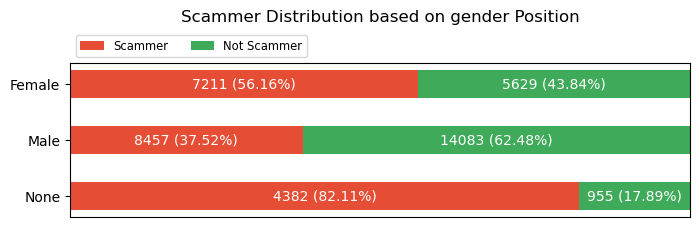

In [16]:
results_perc = {}
results = {}
i = 1

for gender in df.columns[-11:-8]:
    results_perc[" ".join(gender.split("_")[1:])] = [
        df.loc[((df[gender] == 1))]['is_scammer'].value_counts()[1], 
        df.loc[((df[gender] == 1))]['is_scammer'].value_counts()[0]
    ]
    i += 1

for gender in df.columns[-11:-8]:
    scammer_perc = float(df.loc[((df[gender] == 1))]['is_scammer'].value_counts()[1])*100/(df.loc[((df[gender] == 1))]['is_scammer'].count())
    results[" ".join(gender.split("_")[1:])] = [
        scammer_perc, 
        100 - scammer_perc
    ]
    i += 1

cat_names = ['Scammer', 'Not Scammer']

labels = list(results.keys())
data = np.array(list(results.values()))
data_2 = np.array(list(results_perc.values()))
data_cum = data.cumsum(axis=1)
cat_col = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, data.shape[1]))

fig, ax = plt.subplots(figsize=(8, 2))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())

# matplotlib.pyplot.barh(y, width, height=0.8, left=None, *, align='center', data=None, **kwargs)[source]
# matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, hatch=None, data=None)
for i, (colname, color) in enumerate(zip(cat_names, cat_col)):
    widths = data[:, i]
    widths_2 = data_2[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.5, label=colname, color=color)
    xcenters = starts + widths / 2
    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
#     print("colname: ", colname)
    for y, (x, c) in enumerate(zip(xcenters, widths_2)):
        total = data_2[y][0] + data_2[y][1]
        percentage = c*100/total
#         print("y: ", y)
#         print("x: ", x)
#         print(" ")
        ax.text(x, y, str(int(c))+f" ({percentage:.2f}%)", ha='center', va='center', color=text_color)
ax.legend(ncol=len(cat_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')
plt.title("Scammer Distribution based on gender Position", pad=30)

Above result show that over 82% of users that does not specify their gender are scammers. Meanwhile female users are more likely to be a scammer (56.2%) compared to male users (37.5).

Terdapat korelasi yang kuat antara akun yang tidak mengisi fitur gender, job position, dan birthday. Akun-akun dengan karakteristik adanya data kosong pada fitur tersebut memiliki proporsi scammer yang jauh lebih tinggi.

In [17]:
df.loc[(df['gender_None'] == 1) & (df['job_position_LAINNYA'] == 1) & (df['birthday'] > 32500)]['is_scammer'].value_counts()

is_scammer
1    4382
0     955
Name: count, dtype: int64

In [18]:
4382/(4382+955)

0.8210605208918869

cari jumlah akun dengan gender = None, job position = Lainnya, birthday > 32500
buat diagram vennya

In [19]:
!pip install matplotlib_venn

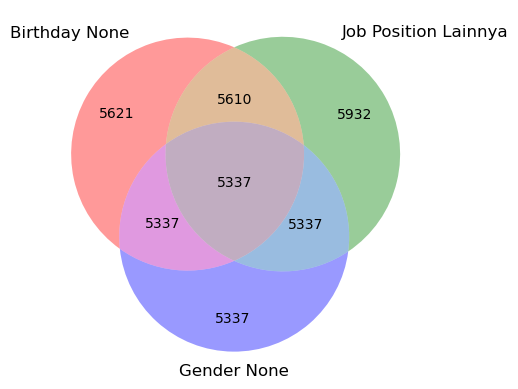

In [20]:
import matplotlib_venn
from matplotlib_venn import venn3

# Create masks for the conditions
birthday_mask = df['birthday'] > 32500
job_position_mask = df['job_position_LAINNYA'] == 1
gender_mask = df['gender_None'] == 1

# Calculate the size of each subset
birthday = sum(birthday_mask)
job_position = sum(job_position_mask)
gender = sum(gender_mask)
birthday_job_position = sum(birthday_mask & job_position_mask)
birthday_gender = sum(birthday_mask & gender_mask)
job_position_gender = sum(job_position_mask & gender_mask)
birthday_job_position_gender = sum(birthday_mask & job_position_mask & gender_mask)

# Create the Venn diagram
venn3(subsets=(birthday, job_position, birthday_job_position, gender, birthday_gender, job_position_gender, birthday_job_position_gender),
      set_labels=('Birthday None', 'Job Position Lainnya', 'Gender None'))
plt.show()

In [21]:
# results_perc = {}
# results = {}

# for gender in df.columns[-11:-8]:
#     results_perc[" ".join(gender.split("_")[1:])] = [
#         df.loc[((df[gender] == 1))]['is_scammer'].value_counts()[1], 
#         df.loc[((df[gender] == 1))]['is_scammer'].value_counts()[0]
#     ]

# for gender in df.columns[-11:-8]:
#     scammer_perc = float(df.loc[((df[gender] == 1))]['is_scammer'].value_counts()[1])*100/(df.loc[((df[gender] == 1))]['is_scammer'].count())
#     results[" ".join(gender.split("_")[1:])] = [
#         scammer_perc, 
#         100 - scammer_perc
#     ]

# # Adding the None category
# results_perc["None"] = [
#     df.loc[df[df.columns[-8:-11]].sum(axis=1) == 0, 'is_scammer'].value_counts()[1], 
#     df.loc[df[df.columns[-8:-11]].sum(axis=1) == 0, 'is_scammer'].value_counts()[0]
# ]
# scammer_perc_none = float(df.loc[df[df.columns[-8:-11]].sum(axis=1) == 0, 'is_scammer'].value_counts()[1]) * 100 / (df.loc[df[df.columns[-8:-11]].sum(axis=1) == 0, 'is_scammer'].count())
# results["None"] = [
#     scammer_perc_none,
#     100 - scammer_perc_none
# ]

# cat_names = ['Scammer', 'Not Scammer']
# labels = list(results.keys())
# data_2 = np.array(list(results_perc.values()))

# # Assigning colors
# colors = ['green', 'red', 'blue']

# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
# plt.subplots_adjust(wspace=0.4)

# # Plotting the pie chart for Female
# ax1.pie(labels, labels=cat_names, autopct='%1.1f%%', colors=colors)
# ax1.set_title("Scammer Distribution - Female")

# # Plotting the pie chart for Male
# ax2.pie(labels, labels=cat_names, autopct='%1.1f%%', colors=colors)
# ax2.set_title("Scammer Distribution - Male")

# # Plotting the pie chart for None
# #ax3.pie(data_2[:, 2], labels=labels, autopct='%1.1f%%', colors=colors)
# #ax3.set_title("Scammer Distribution - None")

# plt.show()


[Text(0.5, 1.0, 'Account Lifetime Histogram')]

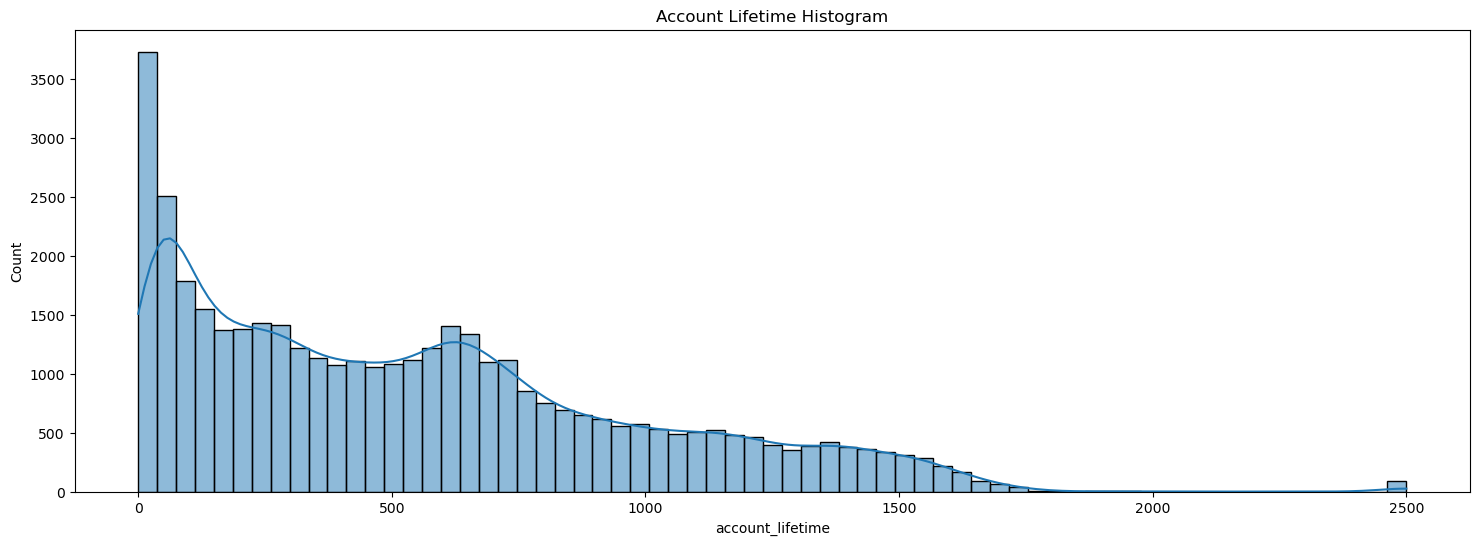

In [22]:
fig, axes = plt.subplots(1, 1, figsize=(18, 6))
sns.histplot(ax=axes, data=df['account_lifetime'], kde=True).set(title='Account Lifetime Histogram')

The 'account_lifetime" feature given information of the number of days from last transfer date in that account, compared to the account's reported date.

In [23]:
df.loc[(df['account_lifetime'] < df['account_lifetime'].quantile(.1))]['is_scammer'].value_counts()[1]

3490

In [24]:
df.loc[((df['account_lifetime'] >= df['account_lifetime'].quantile(0)) & (df['account_lifetime'] < df['account_lifetime'].quantile(.1)))]['is_scammer'].value_counts()[1]

3490

In [25]:
window = 10
acc_lifetime_scammer_rate = {}
for i in range (0,window):
    temp_data = df.loc[((df['account_lifetime'] >= df['account_lifetime'].quantile(.1*i)) & (df['account_lifetime'] < df['account_lifetime'].quantile(.1*(i+1))))]['is_scammer']
    n_scammer = temp_data.value_counts()[1]
    n_tot = len(temp_data)
    acc_lifetime_scammer_rate[i+1] = n_scammer/n_tot

In [26]:
acc_lifetime_scammer_rate

{1: 0.8722819295176206,
 2: 0.7602040816326531,
 3: 0.6800686442755577,
 4: 0.6031003937007874,
 5: 0.5338401177047573,
 6: 0.4307162195422102,
 7: 0.3686782311263132,
 8: 0.2956607011522432,
 9: 0.21057810578105782,
 10: 0.1661654135338346}

Text(0.5, 1.0, 'Scammer Rate based on Partitions of Account Lifetime')

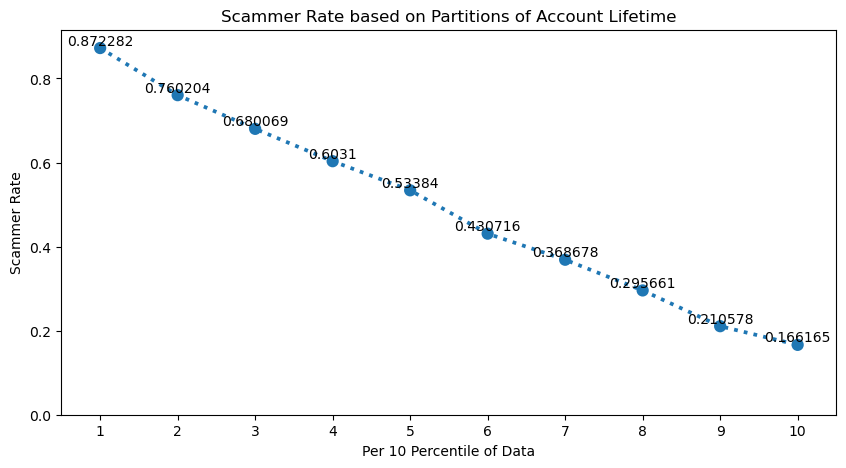

In [27]:
acc_lifetime_df = pd.DataFrame.from_dict(acc_lifetime_scammer_rate, orient='index')
acc_lifetime_df = acc_lifetime_df.rename(columns={0: "Scammer Rate"})

f, (ax) = plt.subplots(figsize=(10, 5))
ax = sns.pointplot(data=acc_lifetime_df, x=[1,2,3,4,5,6,7,8,9,10], y='Scammer Rate', linestyles='dotted')

bp = sns.barplot(data=acc_lifetime_df, x=[1,2,3,4,5,6,7,8,9,10], y='Scammer Rate', alpha=0)
labels = bp.bar_label(bp.containers[0])

plt.xlabel("Per 10 Percentile of Data")
plt.title("Scammer Rate based on Partitions of Account Lifetime")

The above graph divides the account lifetime feature per user per 10 percent of data. The first 10% data is represented by index 1, and so on. We can see that there is a strong, opposite, and almost linear relationship between scammer rate and user's account lifetime. Accounts with low lifetime score has a higher scammer rate (more than 83%) than accounts with higher lifetime.

In [28]:
acc_lifetime_df

,Scammer Rate
1,0.872282
2,0.760204
3,0.680069
4,0.603100
5,0.533840
6,0.430716
7,0.368678
8,0.295661
9,0.210578
10,0.166165


In [29]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.7.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40717 entries, 0 to 40716
Data columns (total 59 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   uid                                           40717 non-null  object 
 1   is_scammer                                    40717 non-null  int64  
 2   trx_date                                      40717 non-null  int64  
 3   report_date                                   40717 non-null  int64  
 4   registereddate                                40717 non-null  int64  
 5   birthday                                      40717 non-null  int64  
 6   is_verified                                   40717 non-null  int64  
 7   aqc_freq_prepaid_mobile                       40717 non-null  int64  
 8   aqc_mean_prepaid_mobile_amount                40717 non-null  float64
 9   aqc_freq_topup                                40717 non-null 

In [31]:
df.loc[(df['dormancy_max_gmt_pay_diff_days'])]['is_scammer'].value_counts()

is_scammer
1    30896
0     9821
Name: count, dtype: int64

In [32]:
df['is_scammer'].value_counts()

is_scammer
0    20667
1    20050
Name: count, dtype: int64

[Text(0.5, 1.0, 'dormancy_max_gmt_pay_diff_days')]

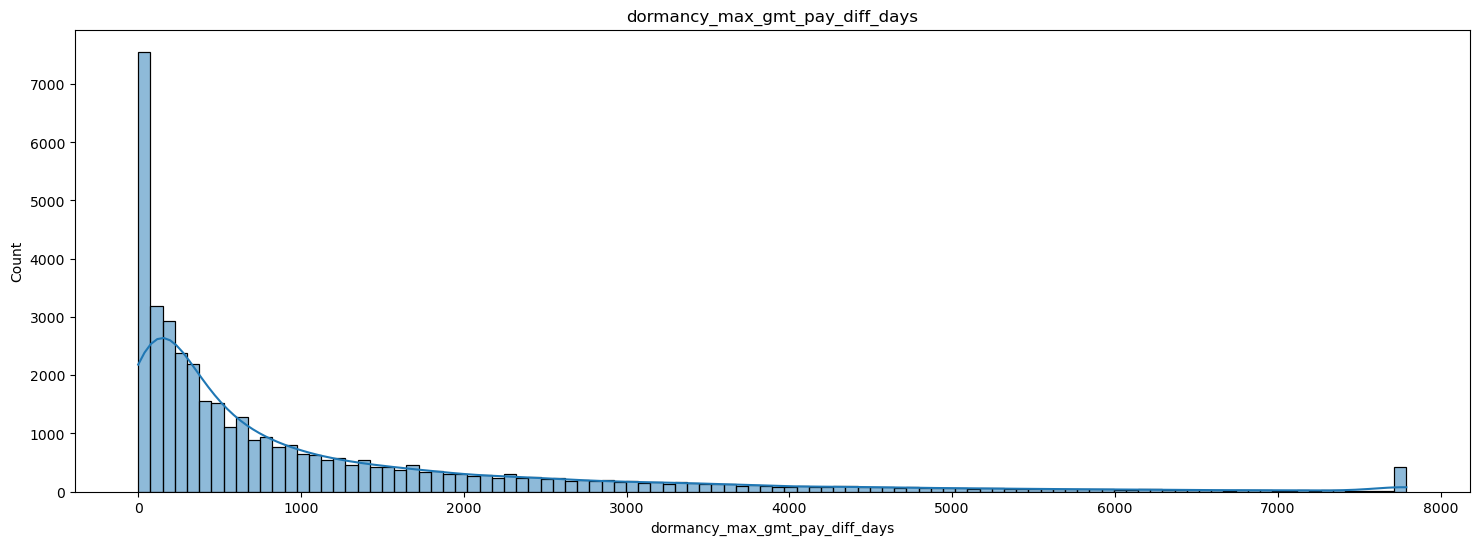

In [33]:
fig, axes = plt.subplots(1, 1, figsize=(18, 6))
sns.histplot(ax=axes, data=df['dormancy_max_gmt_pay_diff_days'], kde=True).set(title='dormancy_max_gmt_pay_diff_days')

[Text(0.5, 1.0, 'dormancy_max_gmt_pay_diff_days')]

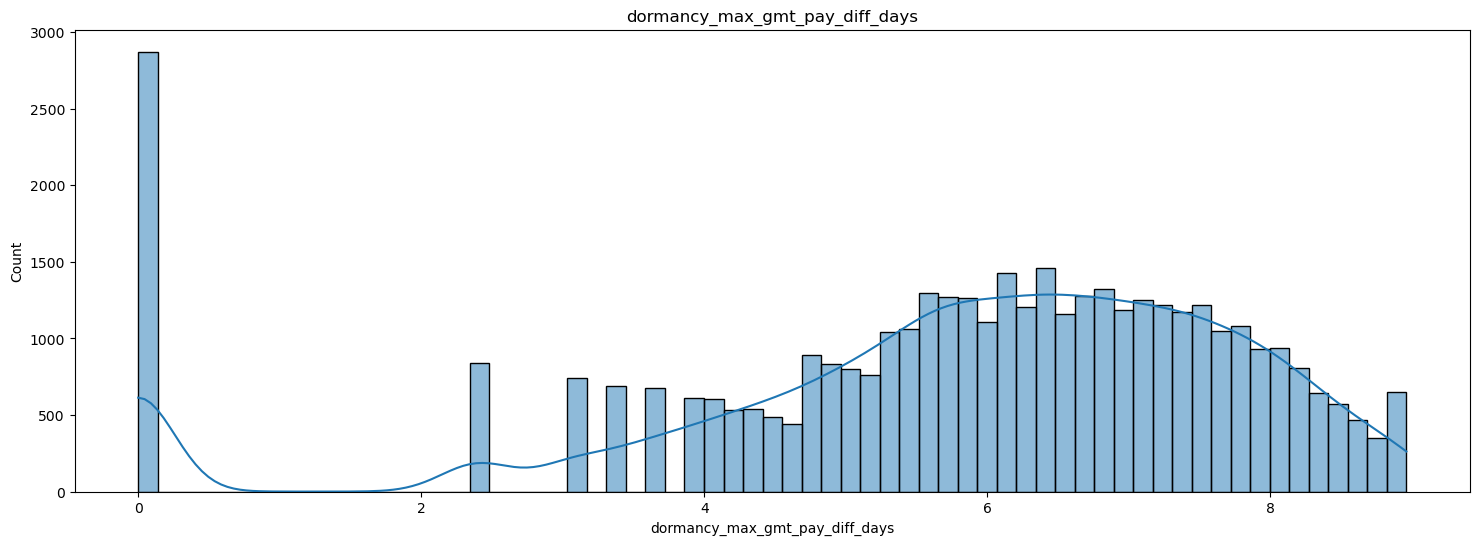

In [34]:
fig, axes = plt.subplots(1, 1, figsize=(18, 6))
sns.histplot(ax=axes, data=np.log(df['dormancy_max_gmt_pay_diff_days']+1), kde=True).set(title='dormancy_max_gmt_pay_diff_days')

In [35]:
df.loc[(df['dormancy_max_gmt_pay_diff_days'] < 1000/13.2)]['is_scammer'].value_counts()

is_scammer
1    5532
0    2026
Name: count, dtype: int64

Dari data di atas, terlihat akun yang aktif (max dormancy kecil) memiliki proporsi scammer yang lebih tinggi sebesar 74% dibandingkan akun yang kurang aktif dalam melakukan transaksi (max dormancy lebih besar)

In [36]:
#df_reg_1 = df.loc[((df['registereddate'] < df['registereddate'].quantile(0.25)))]['is_scammer'].value_counts()
df['dormancy_max_gmt_pay_diff_days'].quantile(0.15)

50.0

In [37]:
coba1 = np.log(df.loc[(df['is_scammer'] == 0) & (df['dormancy_max_gmt_pay_diff_days']>0)]['dormancy_max_gmt_pay_diff_days'])
coba2 = np.log(df.loc[(df['is_scammer'] == 1) & (df['dormancy_max_gmt_pay_diff_days']>0)]['dormancy_max_gmt_pay_diff_days'])

[Text(0.5, 1.0, 'dormancy_max_gmt_pay_diff_days Scammer')]

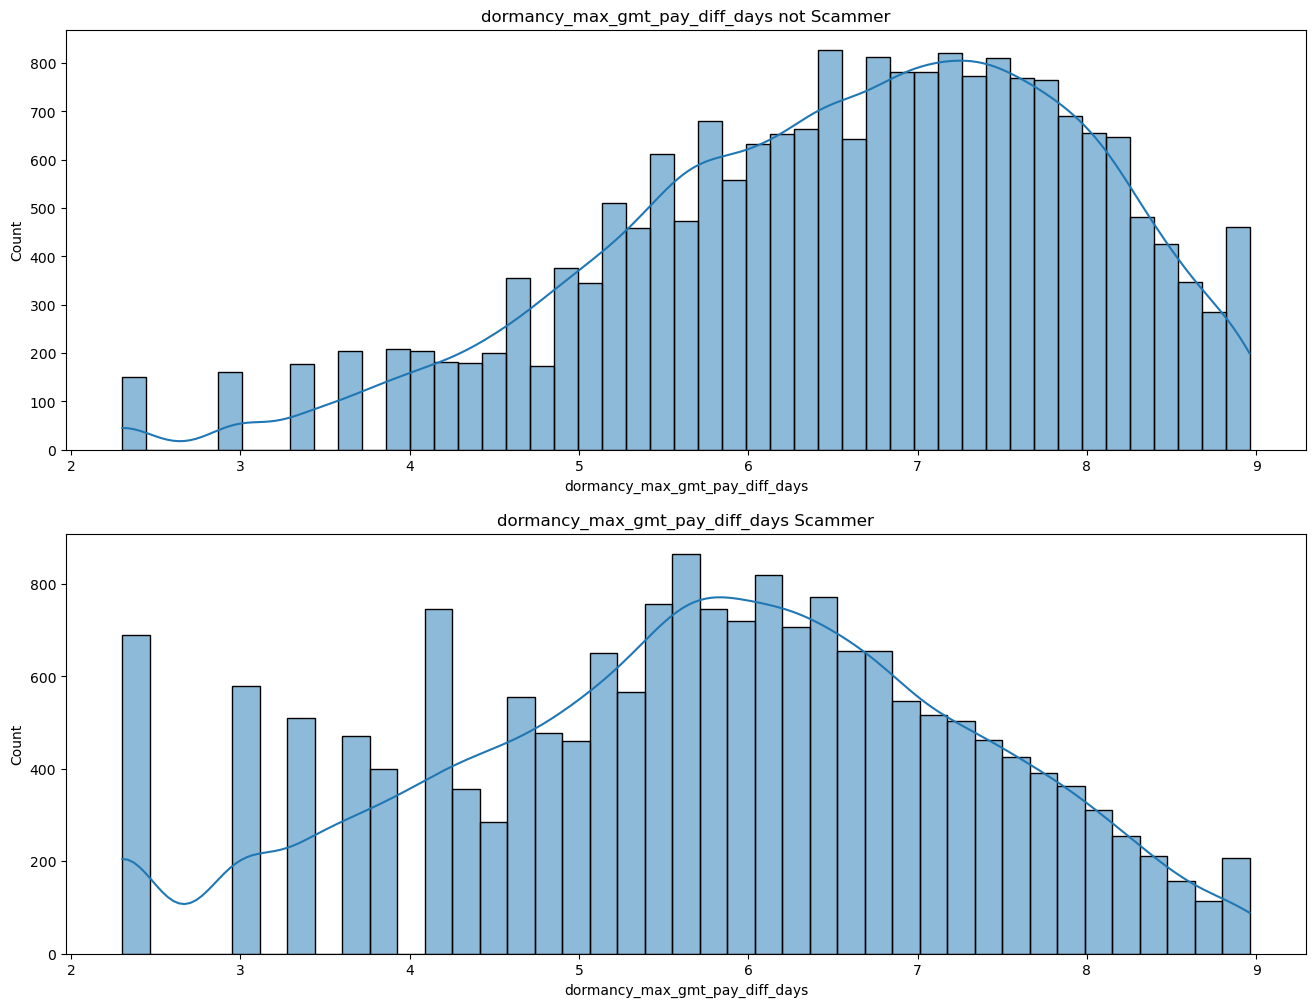

In [38]:
fig, axes = plt.subplots(2, 1, figsize=(16, 12))
sns.histplot(ax=axes[0], data=coba1, kde=True).set(title='dormancy_max_gmt_pay_diff_days not Scammer')
sns.histplot(ax=axes[1], data=coba2, kde=True).set(title='dormancy_max_gmt_pay_diff_days Scammer')

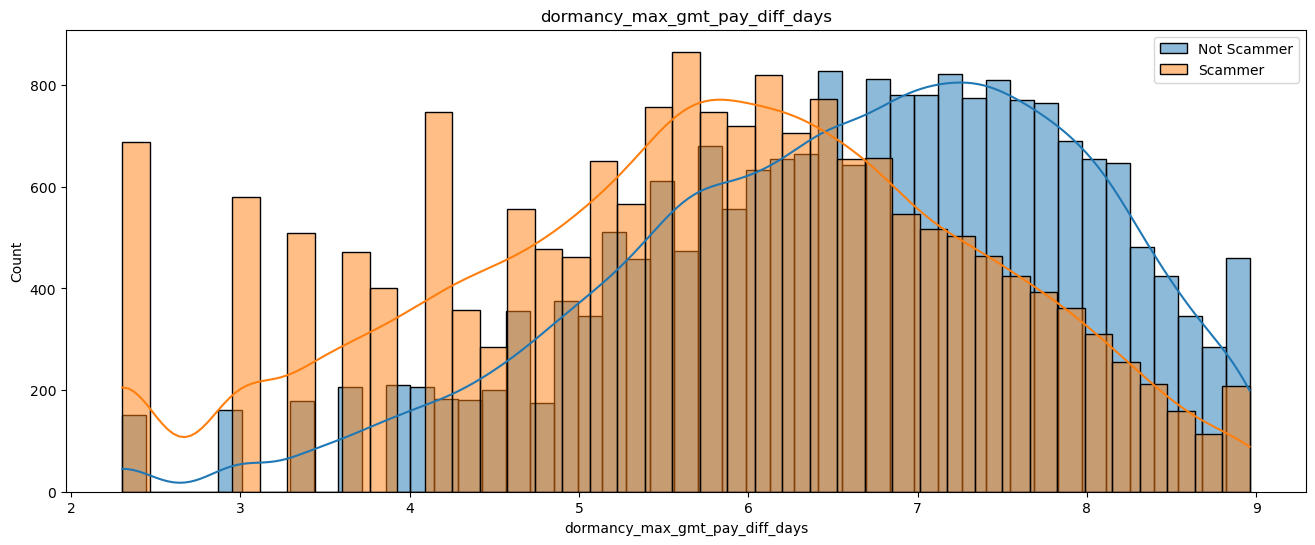

In [39]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.histplot(data=coba1, kde=True, label='Not Scammer', ax=ax)
sns.histplot(data=coba2, kde=True, label='Scammer', ax=ax)
ax.set(title='dormancy_max_gmt_pay_diff_days')
ax.legend()

Text(0.5, 1.0, 'Scammer Rate based on Partitions of Account Maximum Dormancy')

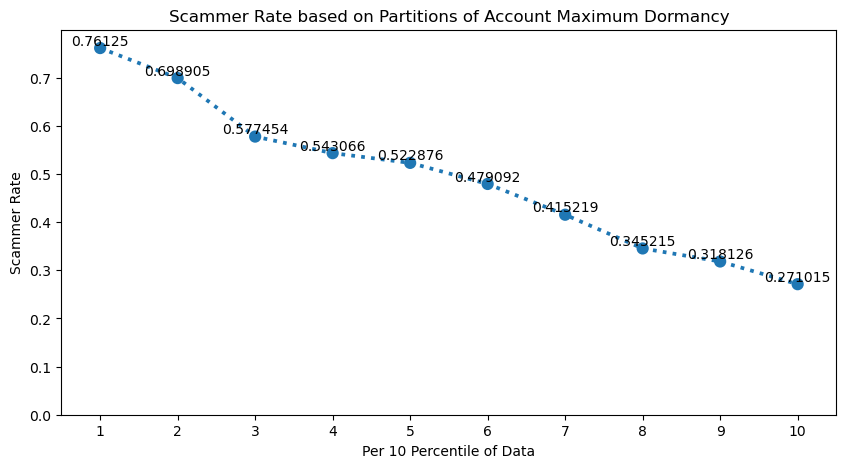

In [40]:
window = 10
dmc_scammer_rate = {}
for i in range (0,window):
    temp_data = df.loc[((df['dormancy_max_gmt_pay_diff_days'] >= df['dormancy_max_gmt_pay_diff_days'].quantile(.1*i)) & (df['dormancy_max_gmt_pay_diff_days'] < df['dormancy_max_gmt_pay_diff_days'].quantile(.1*(i+1))))]['is_scammer']
    n_scammer = temp_data.value_counts()[1]
    n_tot = len(temp_data)
    dmc_scammer_rate[i+1] = n_scammer/n_tot

dmc_df = pd.DataFrame.from_dict(dmc_scammer_rate, orient='index')
dmc_df = dmc_df.rename(columns={0: "Scammer Rate"})

f, (ax) = plt.subplots(figsize=(10, 5))
ax = sns.pointplot(data=dmc_df, x=[i for i in range(1,window+1)], y='Scammer Rate', linestyles='dotted')

bp = sns.barplot(data=dmc_df, x=[i for i in range(1,window+1)], y='Scammer Rate', alpha=0)
labels = bp.bar_label(bp.containers[0])

plt.xlabel("Per 10 Percentile of Data")
plt.title("Scammer Rate based on Partitions of Account Maximum Dormancy")

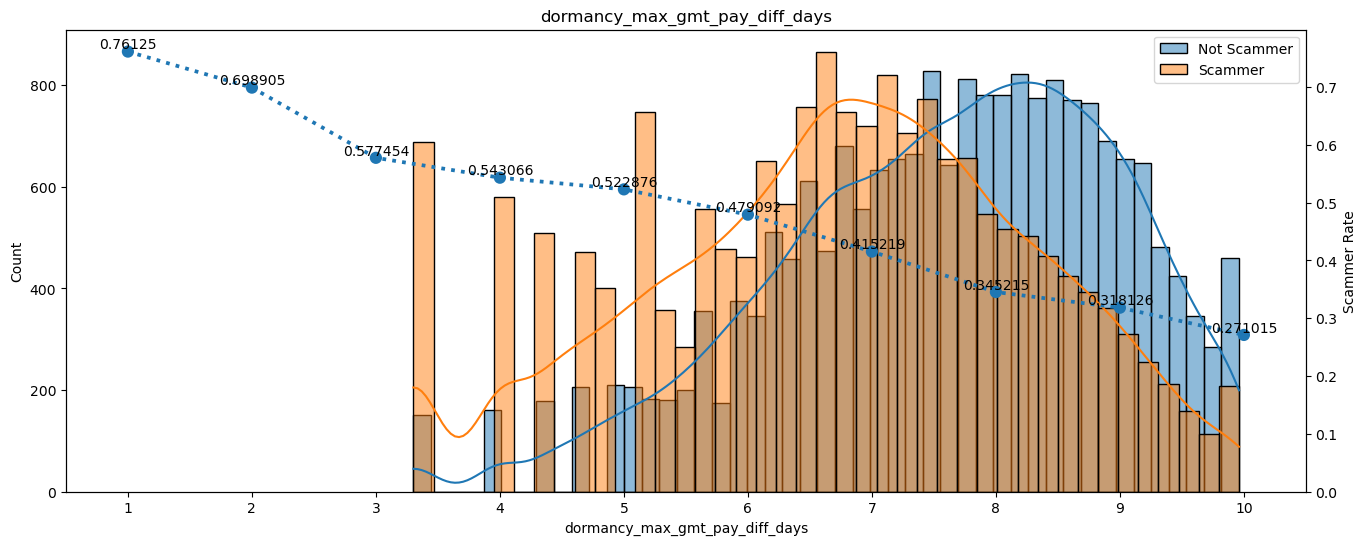

In [41]:
fig, ax1 = plt.subplots(figsize=(16, 6))
sns.histplot(data=coba1, kde=True, label='Not Scammer', ax=ax1)
sns.histplot(data=coba2, kde=True, label='Scammer', ax=ax1)
ax1.set(title='dormancy_max_gmt_pay_diff_days')
ax1.legend()

ax2 = ax1.twinx()
sns.pointplot(data=dmc_df, x=[i for i in range(1,window+1)], y='Scammer Rate', linestyles='dotted', ax=ax2)
bp = sns.barplot(data=dmc_df, x=[i for i in range(1,window+1)], y='Scammer Rate', alpha=0, ax=ax2)

labels = bp.bar_label(bp.containers[0])

Top 10 correlations:
- aqc_freq_topup_within_7d           0.208550
- centrality_indegree_p2p            0.187379
- aqc_total_topup_amount_7d          0.184567
- centrality_outdegree_sendmoney     0.153581
- dormancy_mean_gmt_pay_diff_days    0.126127
- aqc_total_topup_amount_90d         0.124448
- aqc_freq_topup                     0.123155
- aqc_freq_x2x_within_60d            0.119667
- centrality_undirected_p2p          0.118126
- aqc_freq_prepaid_mobile            0.108207
- centrality_outdegree_p2p           0.107248

[Text(0.5, 1.0, 'aqc freq topup within 7d logarithmic')]

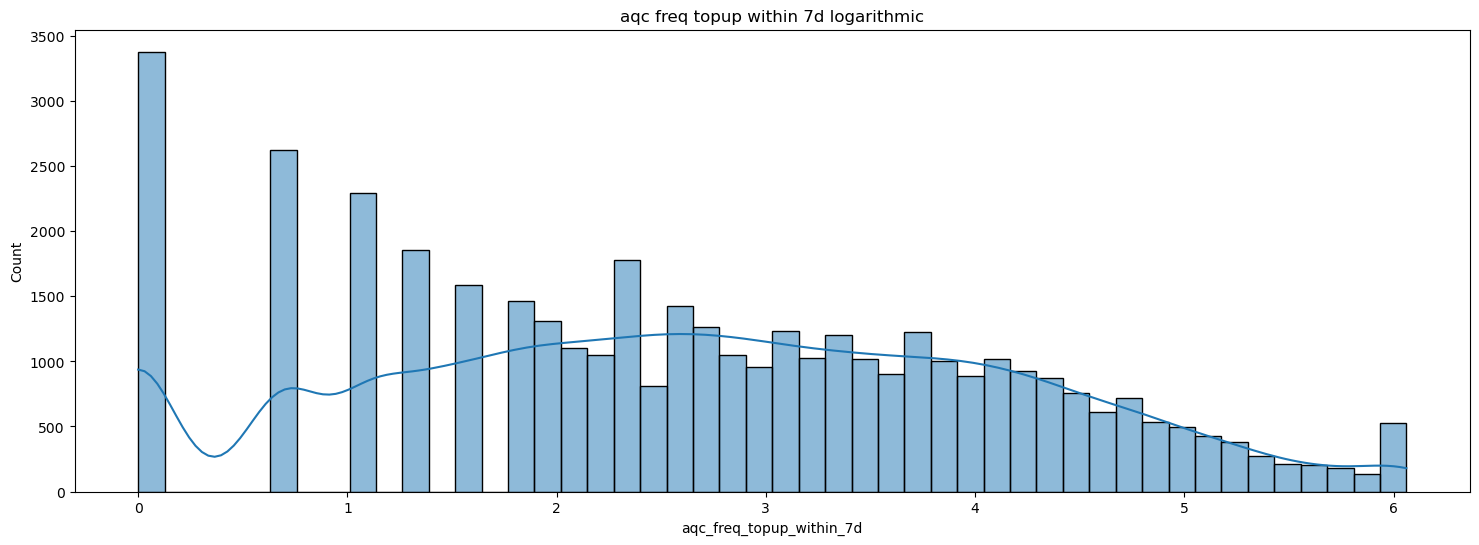

In [48]:
fig, axes = plt.subplots(1, 1, figsize=(18, 6))
sns.histplot(ax=axes, data=np.log(df['aqc_freq_topup_within_7d']+1), kde=True).set(title='aqc freq topup within 7d logarithmic')

[Text(0.5, 1.0, 'aqc freq topup within 7d')]

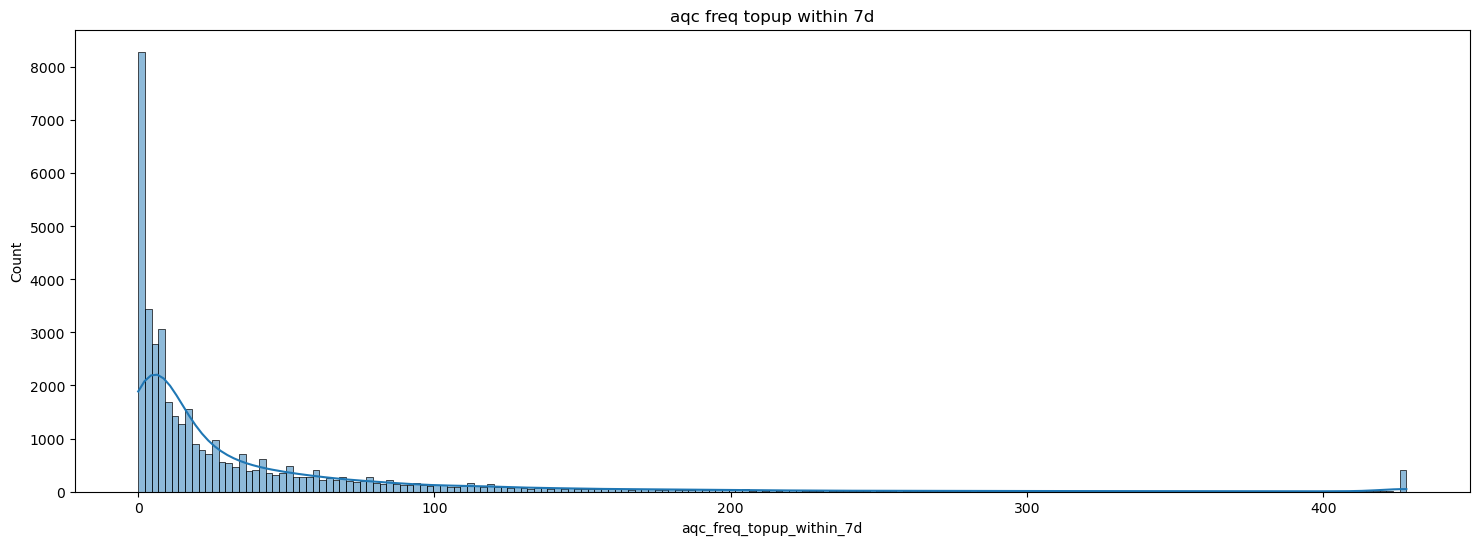

In [49]:
fig, axes = plt.subplots(1, 1, figsize=(18, 6))
sns.histplot(ax=axes, data=df['aqc_freq_topup_within_7d'], kde=True).set(title='aqc freq topup within 7d')

In [75]:
coba3 = np.log(df.loc[(df['is_scammer'] == 0) & (df['aqc_freq_topup_within_7d']>0)]['aqc_freq_topup_within_7d'])
coba4 = np.log(df.loc[(df['is_scammer'] == 1) & (df['aqc_freq_topup_within_7d']>0)]['aqc_freq_topup_within_7d'])

[Text(0.5, 1.0, 'aqc_freq_topup_within_7d Scammer')]

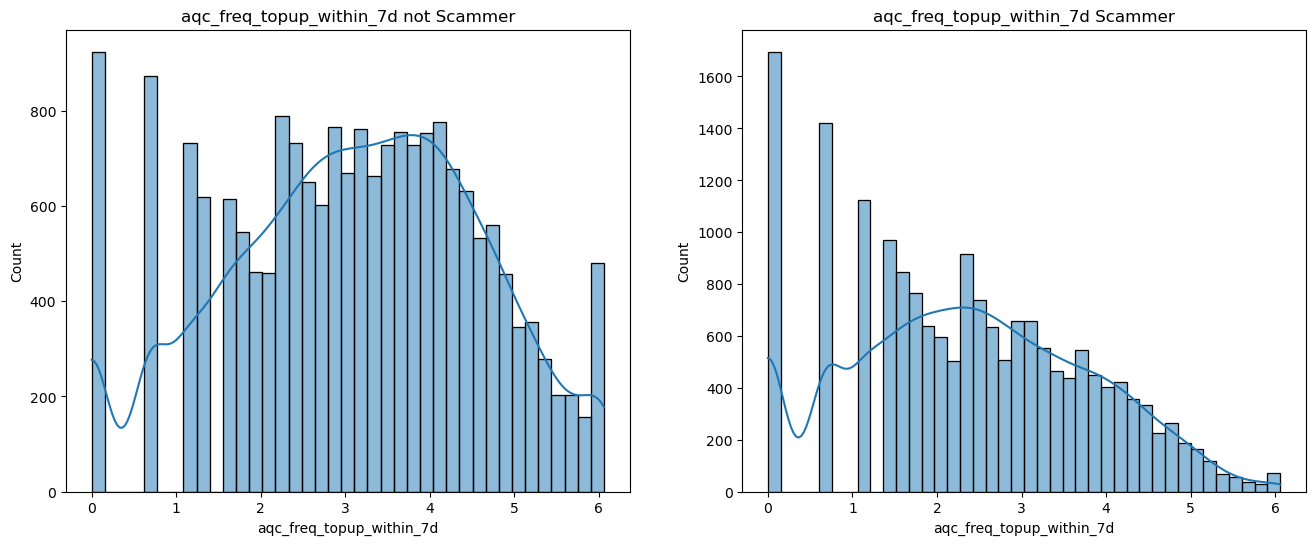

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(ax=axes[0], data=coba3, kde=True).set(title='aqc_freq_topup_within_7d not Scammer')
sns.histplot(ax=axes[1], data=coba4, kde=True).set(title='aqc_freq_topup_within_7d Scammer')

aqc_freq_topup_within_7d = This is total frequency of user doing topup within 7d before their last trx_date

[Text(0.5, 1.0, 'aqc_freq_topup_within_7d')]

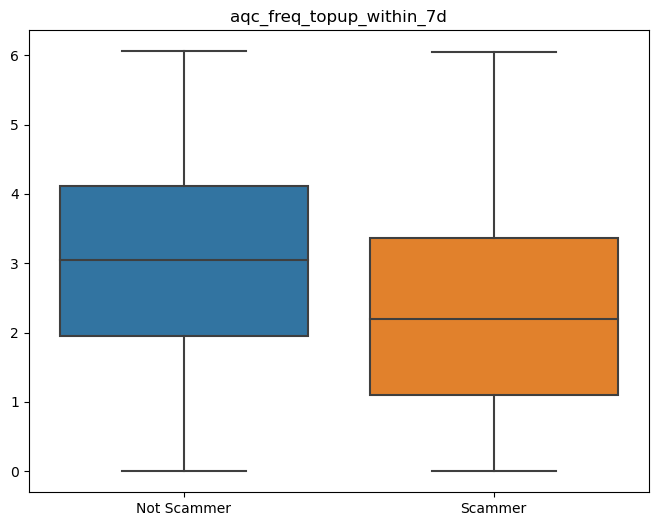

In [83]:
coba3 = np.log(df.loc[(df['is_scammer'] == 0) & (df['aqc_freq_topup_within_7d'])]['aqc_freq_topup_within_7d'])
coba4 = np.log(df.loc[(df['is_scammer'] == 1) & (df['aqc_freq_topup_within_7d'])]['aqc_freq_topup_within_7d'])

fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=[coba3, coba4], ax=ax)
ax.set_xticklabels(['Not Scammer', 'Scammer'])
ax.set(title='aqc_freq_topup_within_7d')

Dari chart di atas terlihat bahwa scammer dalam 7 hari sebelum transaksi terakhir lebih sedikit melakukan topup dibandingkan non scammer

In [60]:
df.loc[(df['aqc_freq_topup_within_7d'] == 0)]['is_scammer'].value_counts()

is_scammer
1    2187
0    1191
Name: count, dtype: int64

In [81]:
2187*100/(2187+1191)

64.7424511545293

Dari data di atas, terlihat proporsi scammer lebih tinggi sebesar 64.7% dibandingkan non-scammer dalam tidak melakukan popup 7 hari sebelum transaksi terakhir

In [85]:
df.loc[(df['aqc_freq_topup_within_7d'] < 40/4)]['is_scammer'].value_counts()

is_scammer
1    10747
0     6827
Name: count, dtype: int64

In [82]:
1074700/(10747+6827)

61.152839421873225

In [84]:
df.loc[(df['aqc_freq_topup_within_7d'] >= 400)]['is_scammer'].value_counts()

is_scammer
0    416
1     54
Name: count, dtype: int64

Terdapat data kosong dalam aqc_freq_topup_within_7d

In [57]:
#np.log(df.loc[(df['is_scammer'] == 1) & (df['aqc_freq_topup_within_7d']>0)]['aqc_freq_topup_within_7d']).value_counts()

Top 10 correlations:
- centrality_indegree_p2p            0.187379
- centrality_outdegree_sendmoney     0.153581
- aqc_total_topup_amount_90d         0.124448
- aqc_freq_topup                     0.123155
- aqc_freq_x2x_within_60d            0.119667
- centrality_undirected_p2p          0.118126
- aqc_freq_prepaid_mobile            0.108207
- centrality_outdegree_p2p           0.107248

centrality_indegree_p2p = This is value of indegree centrality of p2p transaction per user for the latest month

[Text(0.5, 1.0, 'centrality indegree p2p')]

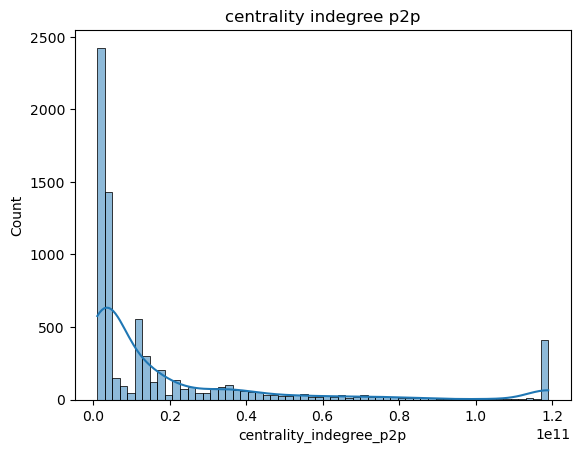

In [110]:
fig, axes = plt.subplots(1, 1)
sns.histplot(ax=axes, data=df.loc[df['centrality_indegree_p2p']>0.01*1e11]['centrality_indegree_p2p'], kde=True).set(title='centrality indegree p2p')

[Text(0.5, 1.0, 'centrality indegree p2p')]

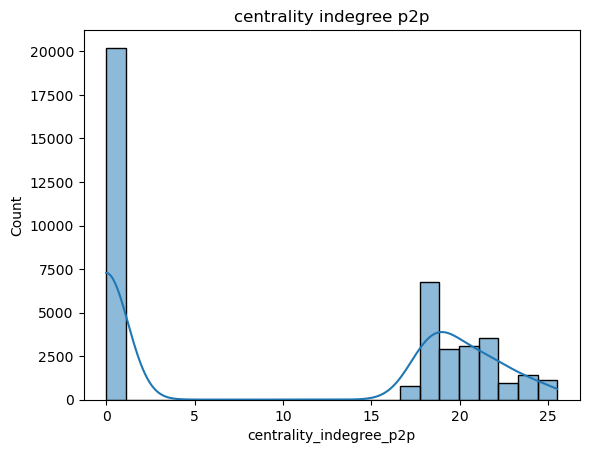

In [88]:
fig, axes = plt.subplots(1, 1)
sns.histplot(ax=axes, data=np.log(df['centrality_indegree_p2p']+1), kde=True).set(title='centrality indegree p2p')

In [98]:
df.loc[(df['centrality_indegree_p2p'] == 0)]['is_scammer'].value_counts()

is_scammer
1    11501
0     8720
Name: count, dtype: int64

Pada akun yang tidak menerima uang dari p2p dalam 1 bulan terakhir juga memiliki proporsi scammer sebesar 56.87% dibandingkan akun non-scammer

In [111]:
df.loc[(df['centrality_indegree_p2p'] > 1.1*1e11)]['is_scammer'].value_counts()

is_scammer
1    421
0      9
Name: count, dtype: int64

Jumlah uang yang masuk pada akun scammer memiliki proporsi 97% pada akun yang menerima uang lebih dari 1.1M

In [120]:
df.loc[(np.log(df['centrality_indegree_p2p']+1)) > 0]['is_scammer'].value_counts()

is_scammer
0    11947
1     8549
Name: count, dtype: int64

[Text(0.5, 1.0, 'centrality outdegree sendmoney')]

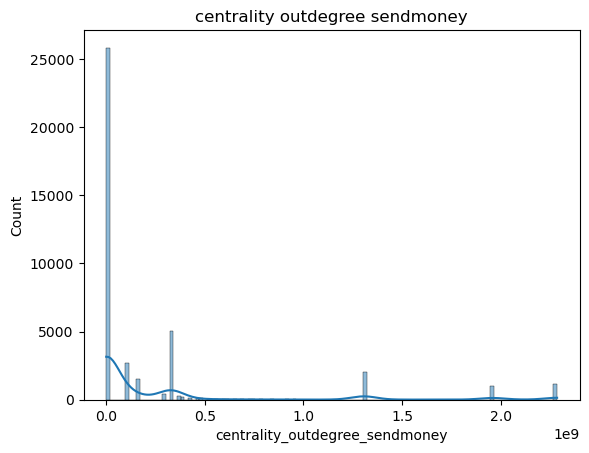

In [123]:
fig, axes = plt.subplots(1, 1)
sns.histplot(ax=axes, data=df['centrality_outdegree_sendmoney'], kde=True).set(title='centrality outdegree sendmoney')

In [124]:
df.loc[(df['centrality_outdegree_sendmoney'] == 0)]['is_scammer'].value_counts()

is_scammer
1    13758
0     7844
Name: count, dtype: int64

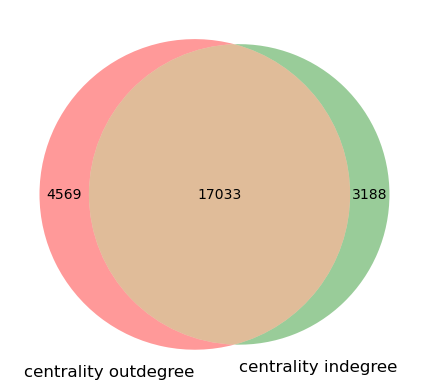

In [4]:
from matplotlib_venn import venn2

# Create masks for the conditions
indegree_mask = df['centrality_indegree_p2p'] == 0
outdegree_mask = df['centrality_outdegree_sendmoney'] == 0

# Calculate the size of each subset
outdegree_indegree = sum(outdegree_mask & indegree_mask)
outdegree = sum(outdegree_mask) - outdegree_indegree
indegree = sum(indegree_mask) - outdegree_indegree

# Create the Venn diagram
venn2(subsets=(outdegree, indegree, outdegree_indegree),
      set_labels=('centrality outdegree', 'centrality indegree'))
plt.show()